In [3]:
#### Loading the packages to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function  # Python 2 and 3
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.preprocessing import LabelEncoder
from collections import Counter
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
drugfeDF= pd.read_csv('drugFEP.csv',dtype={'NDC': str})
drugfeDF.columns
#drugfeDF.head(10)

Index([u'DOSAGEFORMNAME', u'ROUTENAME', u'LABELERNAME', u'STARTMARKETINGDATE',
       u'PHARM_CLASSES', u'MARKETINGCATEGORYNAME', u'DEASCHEDULE', u'logprice',
       u'price'],
      dtype='object')

In [5]:
def f(row):
    if (row['price'] > 10):
        return 1
    else:
        return 0
drugfeDF['priceType'] = drugfeDF.apply(f, axis=1)

drugfeDF['priceType'].head()

y = drugfeDF["priceType"]
x = drugfeDF.ix[:, 0:7]
x


# dummify categorical variables

def Dummify(column):
    column_values = pd.get_dummies(x[column], prefix=column, prefix_sep='__')
    return pd.concat([x.drop(column,axis=1),column_values],axis=1)

x = Dummify('DOSAGEFORMNAME')
x = Dummify('ROUTENAME')
x = Dummify('LABELERNAME')
x = Dummify('PHARM_CLASSES')
x = Dummify('DEASCHEDULE')
#drugPrice = Dummify('OTC')
#drugPrice = Dummify('Classification_for_Rate_Setting')
x = Dummify('MARKETINGCATEGORYNAME')


x_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.1)

In [6]:
# Random Forest Classifier=========================================
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2,class_weight='balanced',random_state=42)

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

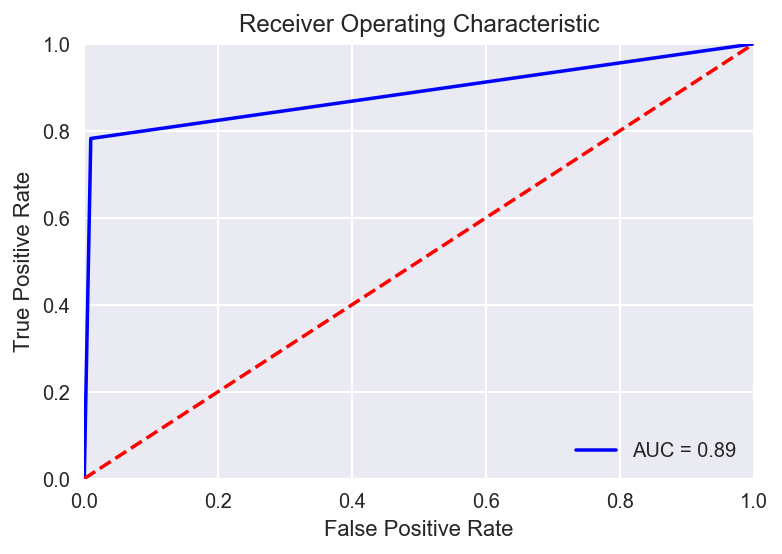

In [7]:
# draw ROC curve

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
#plt.plot(fpr,tpr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

